Bienvenue au sein de ce Jupyter Notebook dédié au projet numéro 5 du parcours de Data Scientist, nommé "Segmentez des clients d'un site e-commerce".

Au sein de cette deuxième étape, je vais vous présenter une première analyse exploratoire que j'ai réalisé sur le jeu de données fourni par Olist, ainsi que le premier feature engineering que j'ai réalisé pour créer un premier modèle de clustering.

## Import des données et création des dataframes

In [1]:
import pandas as pd
df_customer = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_geolocation_dataset.csv')
df_order_item = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_order_payments_dataset.csv')
df_order_review = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_sellers_dataset.csv')
df_product_category = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/product_category_name_translation.csv')



**///// Tableau récapitulatif de toutes les colonnes provenant de tous les jeux de données/////**

Tout d'abord, jetons un coup d'oeil à l'ensemble des jeux de données, en les fusionnant tous à l'aide de différentes clés primaire (order_id, customer_id, product_id et seller_id), puis en utilisant une fonction nommée "df_summary", qui résumera ce que l'on doit savoir par rapport à chaque colonne de notre dataframe final.

In [2]:
from scipy import stats


# Merge data stored in various tables
full_df = df_orders.merge(df_order_review, on='order_id')\
                   .merge(df_order_payment, on='order_id')\
                   .merge(df_customer, on='customer_id')\
                   .merge(df_order_item, on='order_id')\
                   .merge(df_products, on='product_id')\
                   .merge(df_sellers, on='seller_id')
# Drop duplicates
full_df = full_df.drop_duplicates()

def df_summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Column'] = summary['index']
    summary = summary[['Column','dtypes']]
    summary['# Missing'] = df.isnull().sum().values
    summary['# Unique'] = df.nunique().values
    summary['Example'] = df.loc[0].values

    for name in summary['Column'].value_counts().index:
        summary.loc[summary['Column'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)

    return summary

df_summary(full_df)

Dataset Shape: (117329, 39)


,Column,dtypes,# Missing,# Unique,Example,Entropy
0,order_id,object,0,97916,e481f51cbdc54678b7cc49136f2d6af7,16.43
1,customer_id,object,0,97916,9ef432eb6251297304e76186b10a928d,16.43
2,order_status,object,0,7,delivered,0.19
3,order_purchase_timestamp,object,0,97370,2017-10-02 10:56:33,16.42
4,order_approved_at,object,15,89533,2017-10-02 11:07:15,16.26
5,order_delivered_carrier_date,object,1235,80449,2017-10-04 19:55:00,16.02
6,order_delivered_customer_date,object,2471,95021,2017-10-10 21:25:13,16.39
7,order_estimated_delivery_date,object,0,449,2017-10-18 00:00:00,8.47
8,review_id,object,0,97708,a54f0611adc9ed256b57ede6b6eb5114,16.43
9,review_score,int64,0,5,4,1.77


Nous allons ensuite répéter les premières fusions de nos jeux de données, afin d'avoir un aperçu plus détaillé de notre démarche.

In [3]:
#Première fusion détaillée des deux premiers datasets df_customer et df_orders
df_merged_1=pd.merge(df_customer,df_orders,on='customer_id')
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [4]:
#Ajout du dataset df_order_item au jeu de données précedemmant créé

df_merged_2=pd.merge(df_merged_1,df_order_item,on='order_id')
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [5]:
#Ajout du dataset df_sellers au jeu de données précedemmant créé

df_merged_3=pd.merge(df_merged_2,df_sellers,on='seller_id')
df_merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

## Transformation des données et Première segmentation RFM

Maintenant, nous pouvons appliquer nos premières transformations de données ainsi des analyses exploratoires et une première segmentation RFM.

Afin de réaliser une première segmentation RFM, nous allons d'abord créer **plusieurs déciles de données** par rapport à quatre informations que nous allons extraire de notre dataframe, à savoir :    

- La somme des achats par customer
- Les ventes totales réalisées par chaque vendeur
- La récence du dernier achat réalisé pour chaque customer
- La fréquence des achats réalisée par chaque customer

In [6]:
#Premier aperçu du dataframe précédemment créé, regroupant les jeux de données
#df_customer,df_orders,df_order_item et df_sellers
df_merged_3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP


Nous pouvons réaliser différents sous-dataframes à partir du dataframe principal df_merged_3, qui nous permettront de créer une segmentation RFM en fonction des clients de Olist (Récence/Fréquence/Montant)

//////////////

### **Somme des achats par customer**

//////////////

In [7]:
#df_value_per_customer
df_value_per_customer = df_merged_3.groupby(['customer_id'])['price'].sum()
df_value_per_customer.head()

,price
customer_id,
00012a2ce6f8dcda20d059ce98491703,89.80
000161a058600d5901f007fab4c27140,54.90
0001fd6190edaaf884bcaf3d49edf079,179.99
0002414f95344307404f0ace7a26f1d5,149.90
000379cdec625522490c315e70c7a9fb,93.00


In [8]:
df_value_per_customer.describe()

,price
count,98666.000000
mean,137.754076
std,210.645145
min,0.850000
25%,45.900000
50%,86.900000
75%,149.900000
max,13440.000000


In [9]:
# Calculer les déciles
deciles = pd.qcut(df_value_per_customer, 10, labels=False, duplicates='drop')

# Afficher le résultat
print(pd.DataFrame({'Somme des achats': df_value_per_customer, 'decile_client': deciles}))

                                  Somme des achats  decile_client
customer_id                                                      
00012a2ce6f8dcda20d059ce98491703             89.80              5
000161a058600d5901f007fab4c27140             54.90              3
0001fd6190edaaf884bcaf3d49edf079            179.99              8
0002414f95344307404f0ace7a26f1d5            149.90              7
000379cdec625522490c315e70c7a9fb             93.00              5
...                                            ...            ...
fffcb937e9dd47a13f05ecb8290f4d3e             78.00              4
fffecc9f79fd8c764f843e9951b11341             54.90              3
fffeda5b6d849fbd39689bb92087f431             47.90              2
ffff42319e9b2d713724ae527742af25            199.90              8
ffffa3172527f765de70084a7e53aae8             21.80              0

[98666 rows x 2 columns]


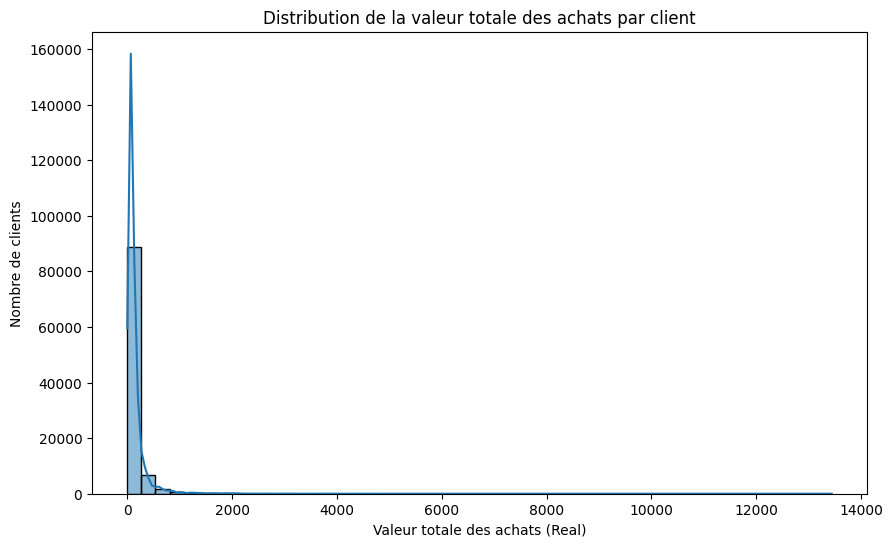

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer la distribution avec un histogramme et une courbe de densité
plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure si nécessaire
sns.histplot(df_value_per_customer, kde=True, bins=50)  # kde=True ajoute la courbe de densité
plt.title('Distribution de la valeur totale des achats par client')
plt.xlabel('Valeur totale des achats (Real)')
plt.ylabel('Nombre de clients')
plt.show()

In [11]:
#Création du dataframe qui sera réutilisable pour la suite de nos analyses RFM

df_value_per_customer_2=pd.DataFrame({'Somme des achats': df_value_per_customer, 'decile_client': deciles}).reset_index()
df_value_per_customer_2.head()

,customer_id,Somme des achats,decile_client
0,00012a2ce6f8dcda20d059ce98491703,89.80,5
1,000161a058600d5901f007fab4c27140,54.90,3
2,0001fd6190edaaf884bcaf3d49edf079,179.99,8
3,0002414f95344307404f0ace7a26f1d5,149.90,7
4,000379cdec625522490c315e70c7a9fb,93.00,5


//////////////

### **Ventes totales par vendeur**

//////////////

In [12]:
df_value_per_seller = df_merged_3.groupby(['seller_id'])['price'].sum()
df_value_per_seller.head()

,price
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2685.00
001cca7ae9ae17fb1caed9dfb1094831,25080.03
001e6ad469a905060d959994f1b41e4f,250.00
002100f778ceb8431b7a1020ff7ab48f,1234.50
003554e2dce176b5555353e4f3555ac8,120.00


In [13]:
# Calculer les déciles
deciles = pd.qcut(df_value_per_seller, 10, labels=False, duplicates='drop')

# Afficher le résultat
print(pd.DataFrame({'Ventes totales': df_value_per_seller, 'decile_vendeur': deciles}))

                                  Ventes totales  decile_vendeur
seller_id                                                       
0015a82c2db000af6aaaf3ae2ecb0532         2685.00               7
001cca7ae9ae17fb1caed9dfb1094831        25080.03               9
001e6ad469a905060d959994f1b41e4f          250.00               2
002100f778ceb8431b7a1020ff7ab48f         1234.50               5
003554e2dce176b5555353e4f3555ac8          120.00               1
...                                          ...             ...
ffcfefa19b08742c5d315f2791395ee5           69.90               0
ffdd9f82b9a447f6f8d4b91554cc7dd3         2101.20               6
ffeee66ac5d5a62fe688b9d26f83f534         1839.86               6
fffd5413c0700ac820c7069d66d98c89         9062.30               8
ffff564a4f9085cd26170f4732393726         1426.30               6

[3095 rows x 2 columns]


Text(0, 0.5, 'Nombre de vendeurs')

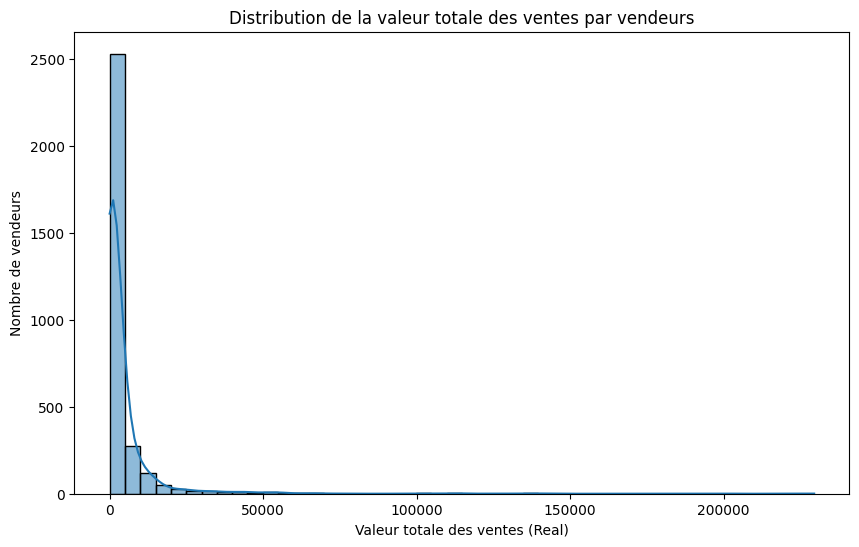

In [14]:
plt.figure(figsize=(10,6))

# Tracer la distribution avec un histogramme et une courbe de densité
sns.histplot(df_value_per_seller,kde=True,binwidth=5000)
plt.title('Distribution de la valeur totale des ventes par vendeurs')
plt.xlabel('Valeur totale des ventes (Real)')
plt.ylabel('Nombre de vendeurs')

In [15]:
#Création du dataframe qui sera réutilisable pour la suite de nos analyses RFM
df_value_per_seller_2=pd.DataFrame({'Somme des ventes': df_value_per_seller, 'decile_vendeur': deciles}).reset_index()
df_value_per_seller_2.head()

,seller_id,Somme des ventes,decile_vendeur
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,7
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,9
2,001e6ad469a905060d959994f1b41e4f,250.00,2
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,5
4,003554e2dce176b5555353e4f3555ac8,120.00,1


In [16]:
df_value_per_seller_2['decile_vendeur'].value_counts()

,count
decile_vendeur,
7,310
9,310
2,310
4,310
0,310
5,309
1,309
6,309
8,309


//////////////

### **Récence du dernier achat réalisé**

//////////////

In [17]:
df_merged_3['order_purchase_timestamp'].max()

'2018-09-03 09:06:57'

In [18]:
df_recence=df_merged_3.groupby(['customer_unique_id'])['order_purchase_timestamp'].max()
df_recence.head()

,order_purchase_timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [19]:
df_recence_2=df_recence.reset_index()
df_recence_2['order_purchase_timestamp']=pd.to_datetime(df_recence_2['order_purchase_timestamp'])

# Calculer la date maximale
max_date = df_recence_2['order_purchase_timestamp'].max()

# Calculer la différence en jours
df_recence_2['days_diff'] = (max_date - df_recence_2['order_purchase_timestamp']).dt.days
df_recence_2.head()

,customer_unique_id,order_purchase_timestamp,days_diff
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [20]:
df_recence_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95420 entries, 0 to 95419
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        95420 non-null  object        
 1   order_purchase_timestamp  95420 non-null  datetime64[ns]
 2   days_diff                 95420 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


In [21]:
# Calculer les déciles sur la colonne 'days_diff'
df_recence_2['decile_days_diff'] = pd.qcut(df_recence_2['days_diff'], 10, labels=False, duplicates='drop')

# Afficher le résultat
print(df_recence_2.head())

                 customer_unique_id order_purchase_timestamp  days_diff  \
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27        115   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27        118   
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03        541   
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41        325   
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42        292   

   decile_days_diff  
0                 2  
1                 2  
2                 9  
3                 7  
4                 6  


Text(0, 0.5, 'Nombre de customers')

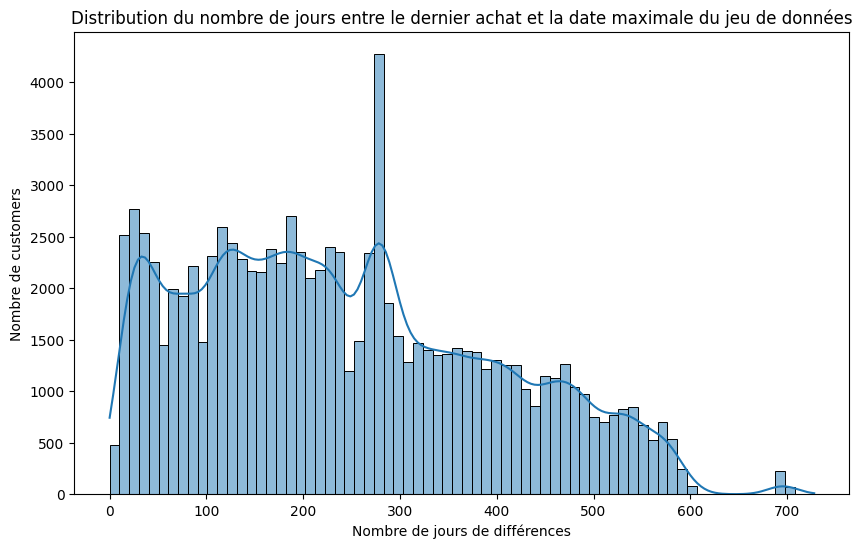

In [22]:
# Tracer la distribution avec un histogramme et une courbe de densité
plt.figure(figsize=(10,6))
sns.histplot(df_recence_2['days_diff'],kde=True)
plt.title('Distribution du nombre de jours entre le dernier achat et la date maximale du jeu de données')
plt.xlabel('Nombre de jours de différences')
plt.ylabel('Nombre de customers')

In [23]:
#Renommage de la colonne 'order_purchase_timestamp' en 'date_dernier_achat'
df_recence_2.rename(columns={'order_purchase_timestamp': 'date_dernier_achat'}, inplace=True)
df_recence_2.head()

,customer_unique_id,date_dernier_achat,days_diff,decile_days_diff
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,2
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,9
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,7
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,6


//////////////

### **Fréquence des achats**

//////////////

In [24]:
df_frequence_unique=df_merged_3.groupby(['customer_unique_id'])['order_id'].nunique()
df_frequence_unique.head()

,order_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


In [25]:
len(df_frequence_unique)

95420

In [26]:
df_frequence_unique_2=df_frequence_unique.reset_index()
df_frequence_unique_2

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1
95416,fffea47cd6d3cc0a88bd621562a9d061,1
95417,ffff371b4d645b6ecea244b27531430a,1
95418,ffff5962728ec6157033ef9805bacc48,1


In [27]:
df_frequence_unique_2['order_id'].value_counts()

,count
order_id,
1,92507
2,2673
3,192
4,29
5,9
6,5
7,3
9,1
16,1


In [28]:
#Renommage de la colonne 'order_id' en 'Nombre achats effectués'
df_frequence_unique_2.rename(columns={'order_id': 'Nombre achats effectués'}, inplace=True)
df_frequence_unique_2.head()

,customer_unique_id,Nombre achats effectués
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


//////////////

### **Fusion de toutes les colonnes avec les déciles**

//////////////

tous les sous-dataframes nécessaires avec les déciles étant créés, nous allons pouvoir procéder à leur fusion avec le dataframe principal. Cette étape permettra d'obtenir un dataframe unique et complet, facilitant ainsi les analyses ultérieures.

In [29]:
df_final=df_merged_3.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [30]:
#Première fusion avec la somme des achats et leurs déciles
df_final_merged_1=df_final.merge(df_value_per_customer_2,on='customer_id')
df_final_merged_1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Somme des achats,decile_client
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP,124.99,6
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC,289.00,9
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP,139.94,7
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP,149.94,7
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP,230.00,8


In [31]:
#Deuxième fusion avec la somme des ventes et leurs déciles
df_final_merged_2=df_final_merged_1.merge(df_value_per_seller_2,on='seller_id')
df_final_merged_2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Somme des achats,decile_client,Somme des ventes,decile_vendeur
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP,124.99,6,187923.89,9
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC,289.00,9,13685.71,9
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP,139.94,7,187923.89,9
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP,149.94,7,187923.89,9
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP,230.00,8,200472.92,9


In [32]:
#Troisième fusion avec la récence des achats et leurs déciles
df_final_merged_3=df_final_merged_2.merge(df_recence_2,on='customer_unique_id')
df_final_merged_3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,Somme des achats,decile_client,Somme des ventes,decile_vendeur,date_dernier_achat,days_diff,decile_days_diff
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,124.99,6,187923.89,9,2017-05-16 15:05:35,474,9
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,88303,itajai,SC,289.00,9,13685.71,9,2018-01-12 20:48:24,233,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,8577,itaquaquecetuba,SP,139.94,7,187923.89,9,2018-05-19 16:07:45,106,2
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,8577,itaquaquecetuba,SP,149.94,7,187923.89,9,2018-03-13 16:06:38,173,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,14940,ibitinga,SP,230.00,8,200472.92,9,2018-07-29 09:51:30,35,0


In [33]:
#Quatrième fusion avec la récence des achats et leurs déciles
df_final_merged_4=df_final_merged_3.merge(df_frequence_unique_2,on='customer_unique_id')
df_final_merged_4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_city,seller_state,Somme des achats,decile_client,Somme des ventes,decile_vendeur,date_dernier_achat,days_diff,decile_days_diff,Nombre achats effectués
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,124.99,6,187923.89,9,2017-05-16 15:05:35,474,9,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,itajai,SC,289.00,9,13685.71,9,2018-01-12 20:48:24,233,5,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,itaquaquecetuba,SP,139.94,7,187923.89,9,2018-05-19 16:07:45,106,2,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,itaquaquecetuba,SP,149.94,7,187923.89,9,2018-03-13 16:06:38,173,3,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,ibitinga,SP,230.00,8,200472.92,9,2018-07-29 09:51:30,35,0,1


**////**

Création de la colonne "Number of days of delay"

**////**

In [34]:
df_final_merged_4.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'Somme des achats', 'decile_client', 'Somme des ventes',
       'decile_vendeur', 'date_dernier_achat', 'days_diff', 'decile_days_diff',
       'Nombre achats effectués'],
      dtype='object')

In [35]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at',
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date']
df_final_merged_4[datetime_columns] = df_final_merged_4[datetime_columns].apply(pd.to_datetime)
df_final_merged_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [36]:
df_final_merged_4['Number_of_days_of_delay'] = (df_final_merged_4['order_delivered_customer_date'] - df_final_merged_4['order_estimated_delivery_date']).dt.days

df_final_merged_4.loc[:,['order_delivered_customer_date','order_estimated_delivery_date','Number_of_days_of_delay']]

,order_delivered_customer_date,order_estimated_delivery_date,Number_of_days_of_delay
0,2017-05-25 10:35:35,2017-06-05,-11.0
1,2018-01-29 12:41:19,2018-02-06,-8.0
2,2018-06-14 17:58:51,2018-06-13,1.0
3,2018-03-28 16:04:25,2018-04-10,-13.0
4,2018-08-09 20:55:48,2018-08-15,-6.0
...,...,...,...
112645,2018-04-13 20:06:37,2018-04-25,-12.0
112646,2018-04-11 18:54:45,2018-04-20,-9.0
112647,2018-05-09 19:03:15,2018-05-02,7.0
112648,2017-11-16 19:58:39,2017-12-05,-19.0


In [37]:
df_final_merged_4['Number_of_days_of_delay'].value_counts().sort_index()

,count
Number_of_days_of_delay,
-147.0,2
-140.0,1
-135.0,1
-124.0,2
-109.0,1
...,...
166.0,1
167.0,1
175.0,1


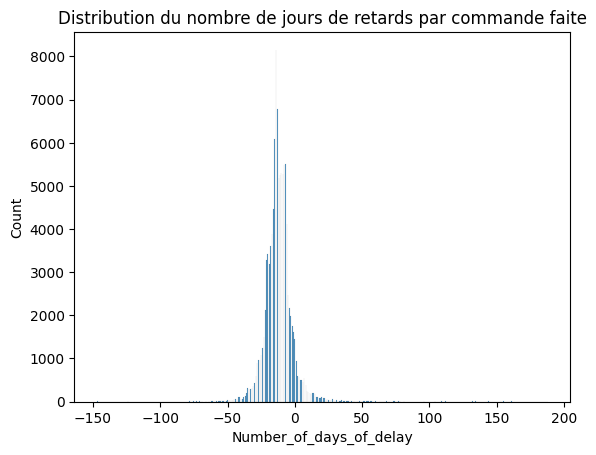

In [38]:
sns.histplot(df_final_merged_4['Number_of_days_of_delay'])
plt.title("Distribution du nombre de jours de retards par commande faite")
plt.show()

//////////////

### **Création des groupes RFM et autres analyses**

//////////////

Maintenant, grâce à la création de notre dataframe final et de la création des colonnes représentant les déciles qu'il nous faut pour réaliser notre première segmentation RFM, voici le référentiel que nous allons utiliser :    

Segmentation en fonction de la Récence du dernier achat avec la somme	du score de la Fréquence des achats ainsi que du Montant total des achats.



Champions	: 4-5	/ 4-5

Clients fidèles :	2-5	/ 3-5

Clients potentiellement fidèles :	3-5 /	1-3

Clients récents :	4-5	/ 0-1

Clients prometteurs :	3-4	/ 0-1

Clients qui méritent une attention :	2-3 /	2-3

Clients sur le point de s’endormir :	2-3 /	0-2

Clients à risque :	0-2 /	2-5

Clients que vous ne devez pas perdre :	0-1 /	4-5

Clients en hibernation :	1-2 /	1-2

Clients perdus :	0-2 /	0-2


La visualisation des clusters de clients en fonction de la segmentation RFM nécessite de regrouper les informations de fréquence et de montant. Pour ce faire, nous allons combiner les valeurs des variables 'decile_client' et 'Nombre d'achats par client' en une seule variable nommée 'Fréquence et Montant'. Cette nouvelle variable permettra de représenter la valeur RFM des clients sur un seul axe.



In [39]:
df_final_merged_4['Fréquence et Montant']=df_final_merged_4['decile_client'] * df_final_merged_4['Nombre achats effectués'] / 2
df_final_merged_4.loc[:,['Somme des achats','decile_client','days_diff','decile_days_diff','Nombre achats effectués','Fréquence et Montant']]

,Somme des achats,decile_client,days_diff,decile_days_diff,Nombre achats effectués,Fréquence et Montant
0,124.99,6,474,9,1,3.0
1,289.00,9,233,5,1,4.5
2,139.94,7,106,2,1,3.5
3,149.94,7,173,3,1,3.5
4,230.00,8,35,0,1,4.0
...,...,...,...,...,...,...
112645,74.90,4,148,3,1,2.0
112646,114.90,6,152,3,1,3.0
112647,37.00,1,147,3,1,0.5
112648,689.00,9,303,6,1,4.5


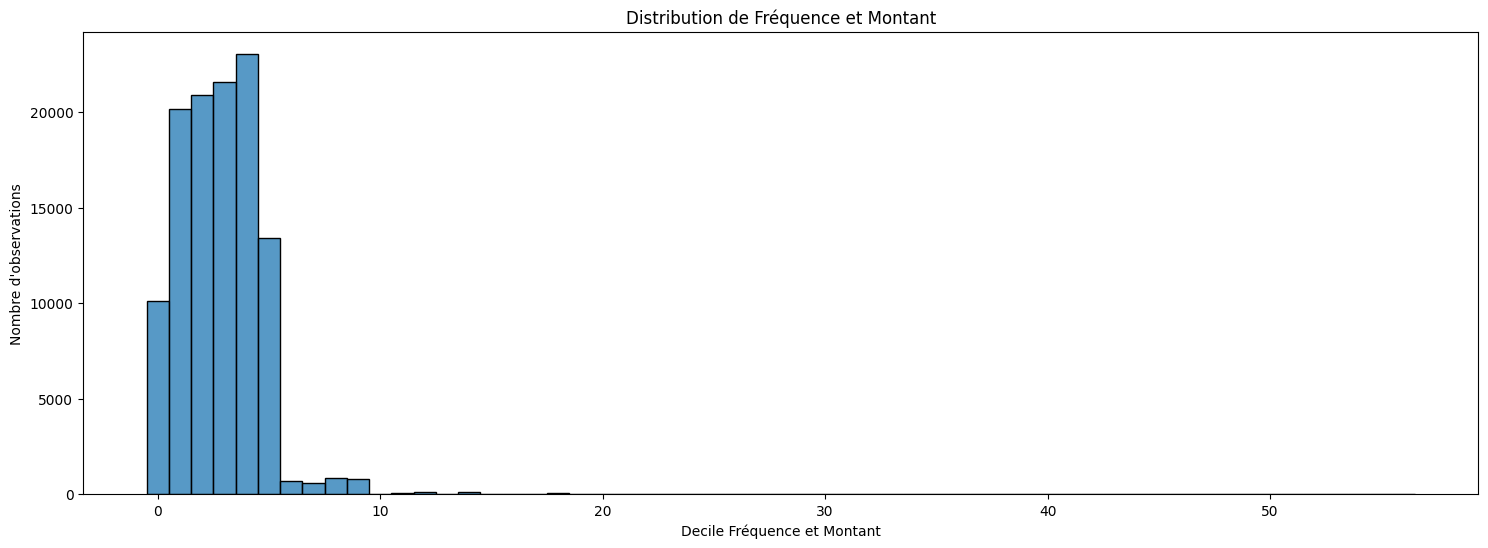

In [40]:
# Histogramme de distribution pour la variable 'Fréquence et Montant'
plt.figure(figsize=(18, 6))
sns.histplot(df_final_merged_4['Fréquence et Montant'], bins=2, discrete=True)
plt.title('Distribution de Fréquence et Montant')
plt.xlabel('Decile Fréquence et Montant')
plt.ylabel('Nombre d\'observations')
plt.show()

In [41]:
#Fonction pour assigner une catégorie en fonction des valeurs des colonnes 'decile_days_diff' et 'Fréquence et Montant'

def assign_category(row):
    if (row['decile_days_diff'] <= 2) & (row['Fréquence et Montant'] >= 4):
        return 'Champions'
    elif (row['decile_days_diff'] <= 6) & (row['Fréquence et Montant'] >= 3):
        return 'Clients fidèles'
    elif (row['decile_days_diff'] <= 4) & (row['Fréquence et Montant'] <= 3) & (row['Fréquence et Montant'] > 1) :
        return 'Clients potentiellement fidèles'
    elif (row['decile_days_diff'] <= 2) & (row['Fréquence et Montant'] <= 1):
        return 'Clients récents'
    elif (row['decile_days_diff'] > 2) & (row['decile_days_diff'] <= 4) & (row['Fréquence et Montant'] <= 1) :
        return 'Clients prometteurs'
    elif (row['decile_days_diff'] >= 4) & (row['decile_days_diff'] <= 6) & (row['Fréquence et Montant'] >= 2) & (row['Fréquence et Montant'] <= 3):
        return 'Clients qui méritent une attention'
    elif (row['decile_days_diff'] >= 4) & (row['decile_days_diff'] <= 6) & (row['Fréquence et Montant'] <= 2) :
        return 'Clients sur le point de s’endormir'
    elif (row['decile_days_diff'] >= 6) & (row['Fréquence et Montant'] >= 2) & (row['Fréquence et Montant'] <= 4):
        return 'Clients à risque'
    elif (row['decile_days_diff'] >= 7) & (row['Fréquence et Montant'] > 4):
        return 'Clients que vous ne devez pas perdre'
    elif (row['decile_days_diff'] >= 6) & (row['decile_days_diff'] <= 8) & (row['Fréquence et Montant'] >= 1) & (row['Fréquence et Montant'] <= 2):
        return 'Clients en hibernation'
    elif (row['decile_days_diff'] >= 6) & (row['Fréquence et Montant'] <= 2):
        return 'Clients perdus'
    else:
        return 'Other'

In [42]:
#Création de la colonne nommée 'Category 2', qui utilise la fonction précedemment créée pour obtenir les différentes catégories de clients

df_final_merged_4['Category 2'] = df_final_merged_4.apply(assign_category, axis=1)

# Montre les nouvelles valeurs uniques au sein de la colonne Category 2
print(df_final_merged_4['Category 2'].unique())

df_final_merged_4.head()

['Clients à risque' 'Clients fidèles' 'Champions'
 'Clients que vous ne devez pas perdre' 'Clients prometteurs'
 'Clients sur le point de s’endormir' 'Clients qui méritent une attention'
 'Clients récents' 'Clients potentiellement fidèles' 'Clients perdus'
 'Clients en hibernation']


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,decile_client,Somme des ventes,decile_vendeur,date_dernier_achat,days_diff,decile_days_diff,Nombre achats effectués,Number_of_days_of_delay,Fréquence et Montant,Category 2
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,6,187923.89,9,2017-05-16 15:05:35,474,9,1,-11.0,3.0,Clients à risque
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,9,13685.71,9,2018-01-12 20:48:24,233,5,1,-8.0,4.5,Clients fidèles
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7,187923.89,9,2018-05-19 16:07:45,106,2,1,1.0,3.5,Clients fidèles
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7,187923.89,9,2018-03-13 16:06:38,173,3,1,-13.0,3.5,Clients fidèles
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8,200472.92,9,2018-07-29 09:51:30,35,0,1,-6.0,4.0,Champions


<Axes: xlabel='count', ylabel='Category 2'>

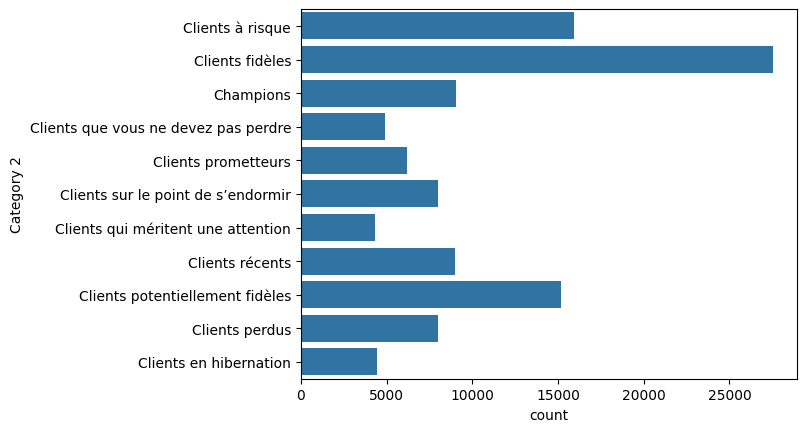

In [43]:
#Countplot du nombre de valeur au sein de la colonne 'Category 2'
sns.countplot(df_final_merged_4['Category 2'])

<Axes: xlabel='count', ylabel='customer_state'>

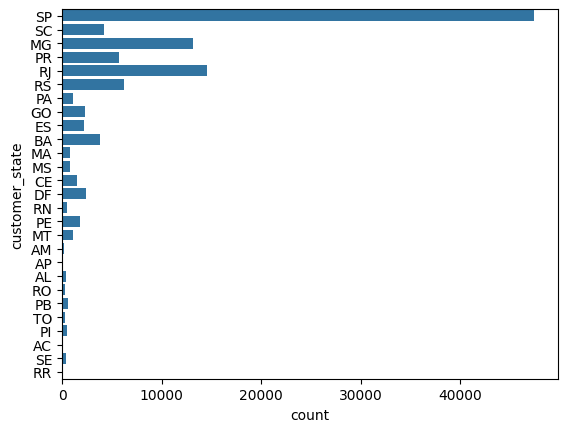

In [44]:
#Countplot du nombre de clients présents au sein de chaque État
sns.countplot(df_final_merged_4['customer_state'])

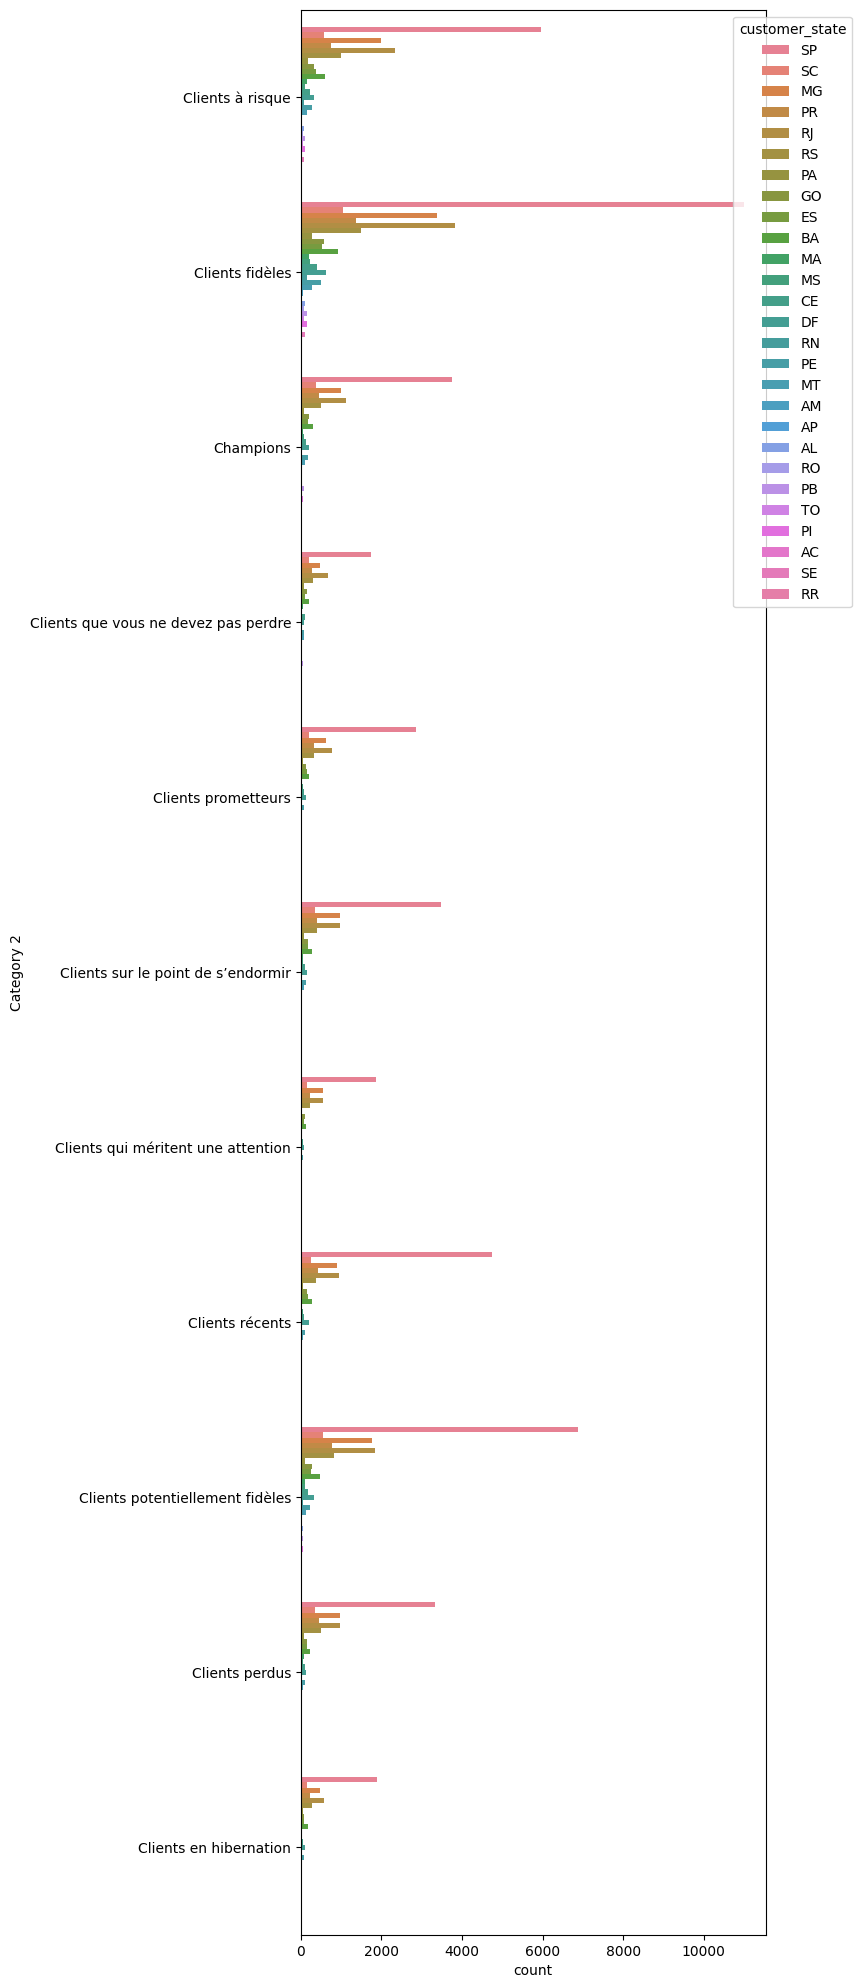

In [45]:
#Countplot du nombre de catégories de clients en fonction de la région où se trouve le client

plt.figure(figsize=(6, 25))  # Ajustez la taille de la figure si nécessaire - j'ai inversé la largeur et la hauteur
sns.countplot(data=df_final_merged_4, y='Category 2', hue='customer_state') # Remplacez x par y
plt.yticks(rotation=0)  # Les étiquettes de l'axe y sont maintenant horizontales par défaut
plt.legend(title='customer_state', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Scatterplot de decile_days_diff et Fréquence et Montant**

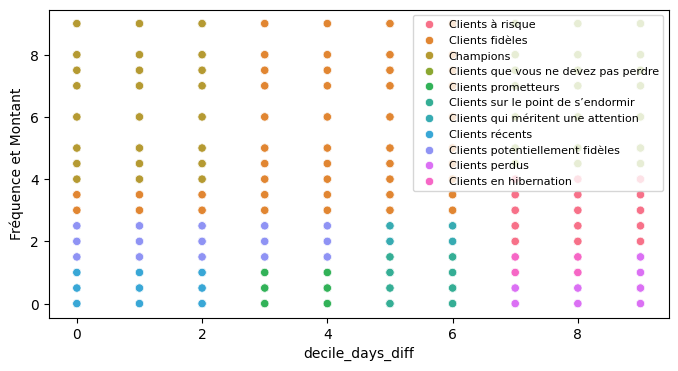

In [46]:
df_freq_mont_filtered = df_final_merged_4.loc[df_final_merged_4['Fréquence et Montant']<10]
plt.figure(figsize=(8,4))

sns.scatterplot(x='decile_days_diff',y='Fréquence et Montant',data=df_freq_mont_filtered,hue='Category 2')

plt.legend(fontsize=8)

plt.show()

**Nombre de clients par catégorie de clients**

In [47]:
!pip install squarify==0.4.3  # Install necessary library


In [48]:
Nombre_clients_par_catégorie = df_final_merged_4.groupby('Category 2')['customer_unique_id'].nunique()
Nombre_clients_par_catégorie=Nombre_clients_par_catégorie.sort_values(ascending=False)
Nombre_clients_par_catégorie=Nombre_clients_par_catégorie.reset_index()
# Calculer la somme totale des achats
total_clients = 112650

# # Ajouter une colonne du pourcentage
Nombre_clients_par_catégorie['Percentage'] = round(((Nombre_clients_par_catégorie['customer_unique_id'] / total_clients) * 100),2)
Nombre_clients_par_catégorie

,Category 2,customer_unique_id,Percentage
0,Clients fidèles,21955,19.49
1,Clients à risque,13765,12.22
2,Clients potentiellement fidèles,13682,12.15
3,Clients récents,8509,7.55
4,Clients perdus,7549,6.70
5,Clients sur le point de s’endormir,7533,6.69
6,Champions,6349,5.64
7,Clients prometteurs,5881,5.22
8,Clients en hibernation,4097,3.64
9,Clients qui méritent une attention,3912,3.47


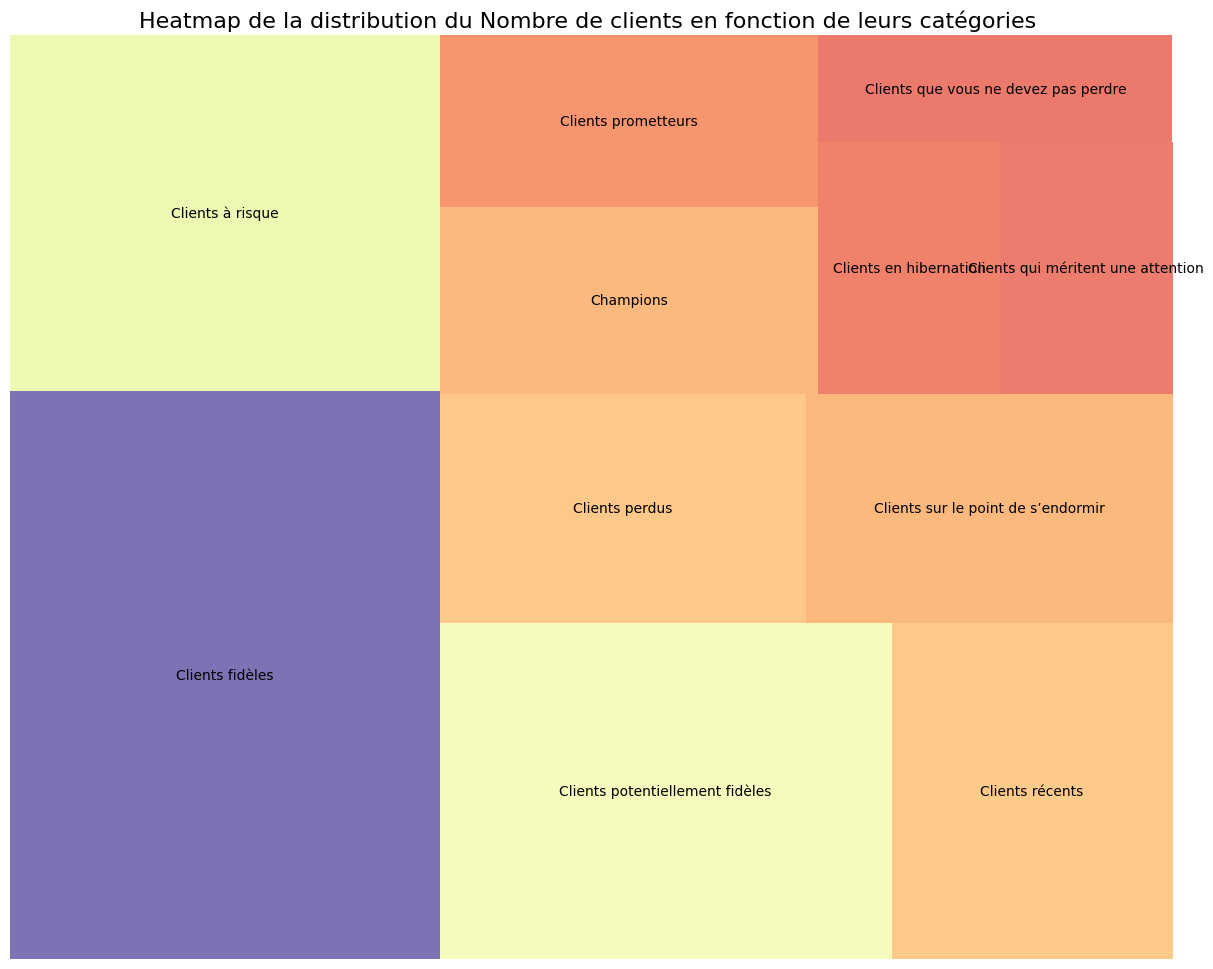

In [49]:
import squarify

# Create the treemap
values = df_final_merged_4['Category 2'].value_counts().values

plt.figure(figsize=(15,12))  # Adjust size as needed
squarify.plot(sizes=Nombre_clients_par_catégorie['Percentage'], label=Nombre_clients_par_catégorie['Category 2'], alpha=0.8, color=plt.cm.Spectral(values / values.max()))
plt.title('Heatmap de la distribution du Nombre de clients en fonction de leurs catégories ', fontsize=16)
plt.axis('off')  # Remove axes
plt.show()

**CA Total par catégorie de clients**

In [50]:
Somme_CA_par_catégorie= df_final_merged_4.groupby(['Category 2'])['Somme des achats'].sum()
Somme_CA_par_catégorie.sort_values(ascending=False)

,Somme des achats
Category 2,
Clients fidèles,6284860.33
Champions,3408895.30
Clients que vous ne devez pas perdre,2633800.00
Clients à risque,2085659.53
Clients potentiellement fidèles,1165512.73
Clients qui méritent une attention,369499.07
Clients sur le point de s’endormir,310791.73
Clients récents,285435.67
Clients perdus,255393.66


In [51]:
Somme_CA_par_catégorie =Somme_CA_par_catégorie.reset_index()
Somme_CA_par_catégorie

,Category 2,Somme des achats
0,Champions,3408895.30
1,Clients en hibernation,232270.45
2,Clients fidèles,6284860.33
3,Clients perdus,255393.66
4,Clients potentiellement fidèles,1165512.73
5,Clients prometteurs,198779.90
6,Clients que vous ne devez pas perdre,2633800.00
7,Clients qui méritent une attention,369499.07
8,Clients récents,285435.67
9,Clients sur le point de s’endormir,310791.73


In [52]:
# Calculer la somme totale des achats
total_sales = Somme_CA_par_catégorie['Somme des achats'].sum()

# Ajouter une colonne du pourcentage
Somme_CA_par_catégorie['Percentage'] = round(((Somme_CA_par_catégorie['Somme des achats'] / total_sales) * 100),2)

# Afficher le résultat
display(Somme_CA_par_catégorie.sort_values(by='Percentage',ascending=False))

,Category 2,Somme des achats,Percentage
2,Clients fidèles,6284860.33,36.47
0,Champions,3408895.30,19.78
6,Clients que vous ne devez pas perdre,2633800.00,15.29
10,Clients à risque,2085659.53,12.10
4,Clients potentiellement fidèles,1165512.73,6.76
7,Clients qui méritent une attention,369499.07,2.14
9,Clients sur le point de s’endormir,310791.73,1.80
8,Clients récents,285435.67,1.66
3,Clients perdus,255393.66,1.48
1,Clients en hibernation,232270.45,1.35


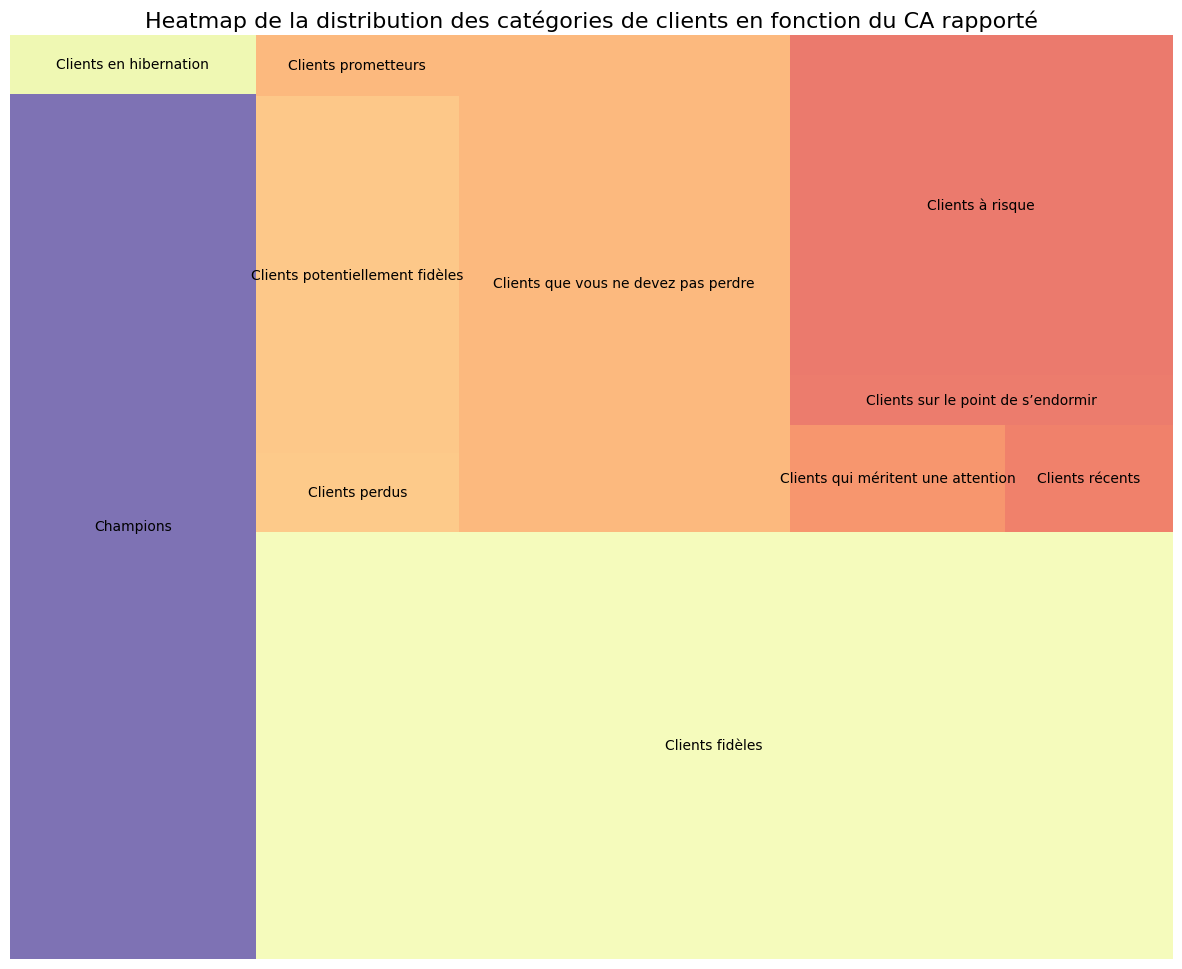

In [53]:
# Treemap de la distribution du CA en fonction des catégories de clients
plt.figure(figsize=(15,12))
squarify.plot(sizes=Somme_CA_par_catégorie['Percentage'], label=Somme_CA_par_catégorie['Category 2'], alpha=.8, color=plt.cm.Spectral(values / values.max()))
plt.title('Heatmap de la distribution des catégories de clients en fonction du CA rapporté', fontsize=16)
plt.axis('off')  # Enlève les axes
plt.show()

In [54]:
Clients_all_stats = Somme_CA_par_catégorie.merge(Nombre_clients_par_catégorie,on='Category 2')
Clients_all_stats = Clients_all_stats.rename(columns={
    'Percentage_x': 'Pourcentage du CA/au CA Total',
    'customer_unique_id':'Nombre de clients',
    'Percentage_y': 'Pourcentage du nombre de clients/Nombre total de clients'
})
Clients_all_stats.sort_values('Somme des achats', ascending=False)

,Category 2,Somme des achats,Pourcentage du CA/au CA Total,Nombre de clients,Pourcentage du nombre de clients/Nombre total de clients
2,Clients fidèles,6284860.33,36.47,21955,19.49
0,Champions,3408895.30,19.78,6349,5.64
6,Clients que vous ne devez pas perdre,2633800.00,15.29,3427,3.04
10,Clients à risque,2085659.53,12.10,13765,12.22
4,Clients potentiellement fidèles,1165512.73,6.76,13682,12.15
7,Clients qui méritent une attention,369499.07,2.14,3912,3.47
9,Clients sur le point de s’endormir,310791.73,1.80,7533,6.69
8,Clients récents,285435.67,1.66,8509,7.55
3,Clients perdus,255393.66,1.48,7549,6.70
1,Clients en hibernation,232270.45,1.35,4097,3.64


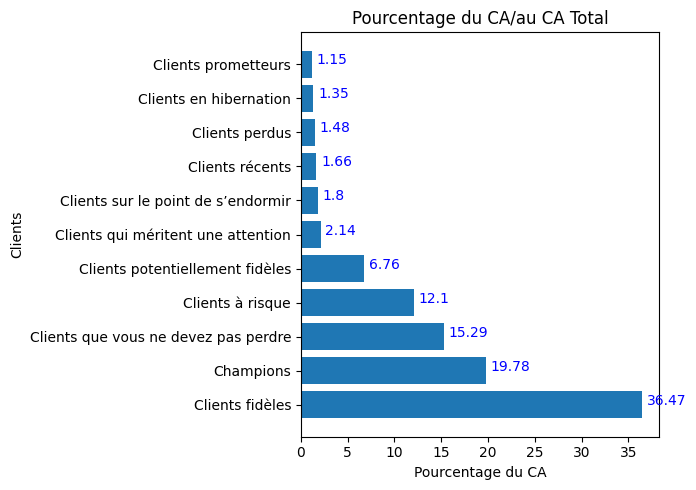

In [55]:
plt.figure(figsize=(7,5))


# Triez le DataFrame par la colonne "Pourcentage du CA/au CA Total" par ordre décroissant
df_clients_all_stats = Clients_all_stats.sort_values(by="Pourcentage du CA/au CA Total", ascending=False)

# Créez le diagramme à barres horizontales
plt.barh(df_clients_all_stats['Category 2'], df_clients_all_stats["Pourcentage du CA/au CA Total"])

# Ajoutez un titre et des étiquettes d'axe
plt.title("Pourcentage du CA/au CA Total")
plt.ylabel("Clients")
plt.xlabel("Pourcentage du CA")

# Ajoutez les labels (valeurs) sur les barres
for i, v in enumerate(df_clients_all_stats["Pourcentage du CA/au CA Total"]):
    plt.text(v + 0.5, i, str(v), color='blue', fontweight='normal') # Ajustez 0.1 pour l'espacement

# Ajustez la disposition pour une meilleure lisibilité
plt.tight_layout()

# Affichez le diagramme à barres
plt.show()

**//////**

**Fusion avec les derniers dataframe df_order_review et df_product_category**

**/////**

In [56]:
print(df_final_merged_4.columns)
display(df_products.head())
display(df_product_category.head())

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'Somme des achats', 'decile_client', 'Somme des ventes',
       'decile_vendeur', 'date_dernier_achat', 'days_diff', 'decile_days_diff',
       'Nombre achats effectués', 'Number_of_days_of_delay',
       'Fréquence et Montant', 'Category 2'],
      dtype='object')


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [57]:
df_products_bis=df_products.loc[:,['product_id','product_category_name']]
df_final_merged_5=df_final_merged_4.merge(df_products_bis,on='product_id').merge(df_product_category,on='product_category_name')
df_final_merged_5=df_final_merged_5.drop('product_category_name',axis=1)
df_final_merged_5 = df_final_merged_5.rename(columns={'product_category_name_english': 'Catégorie de produit'})
df_final_merged_5.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Somme des ventes,decile_vendeur,date_dernier_achat,days_diff,decile_days_diff,Nombre achats effectués,Number_of_days_of_delay,Fréquence et Montant,Category 2,Catégorie de produit
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,187923.89,9,2017-05-16 15:05:35,474,9,1,-11.0,3.0,Clients à risque,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,13685.71,9,2018-01-12 20:48:24,233,5,1,-8.0,4.5,Clients fidèles,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,187923.89,9,2018-05-19 16:07:45,106,2,1,1.0,3.5,Clients fidèles,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,187923.89,9,2018-03-13 16:06:38,173,3,1,-13.0,3.5,Clients fidèles,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,200472.92,9,2018-07-29 09:51:30,35,0,1,-6.0,4.0,Champions,home_confort


In [58]:
df_final_merged_6 = df_final_merged_5.merge(df_order_review,on='order_id')
df_final_merged_6.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Number_of_days_of_delay,Fréquence et Montant,Category 2,Catégorie de produit,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,-11.0,3.0,Clients à risque,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,-8.0,4.5,Clients fidèles,housewares,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,3.5,Clients fidèles,office_furniture,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,-13.0,3.5,Clients fidèles,office_furniture,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,-6.0,4.0,Champions,home_confort,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


**//////**

**Observations de la corrélation entre le nombre de jours de retard et le review_score**

**//////**

In [59]:
df_late=df_final_merged_6.loc[df_final_merged_6['Number_of_days_of_delay']>5]
df_late['review_score'].mean()

1.7358774792869696

In [60]:
df_advanced=df_final_merged_6.loc[df_final_merged_6['Number_of_days_of_delay']<0]
df_advanced['review_score'].mean()

4.2121893680401445

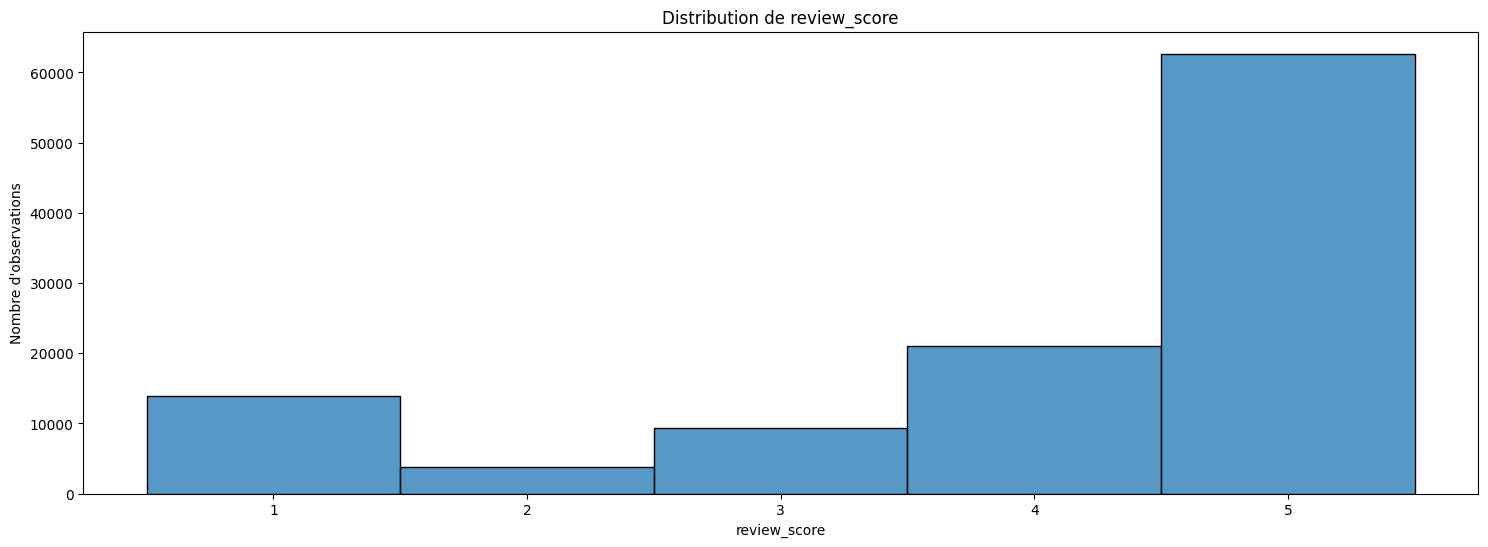

In [61]:
# Histogramme de distribution pour 'review_score'
plt.figure(figsize=(18, 6))
sns.histplot(df_final_merged_6['review_score'], bins=2, discrete=True)
plt.title('Distribution de review_score')
plt.xlabel('review_score')
plt.ylabel('Nombre d\'observations')
plt.show()

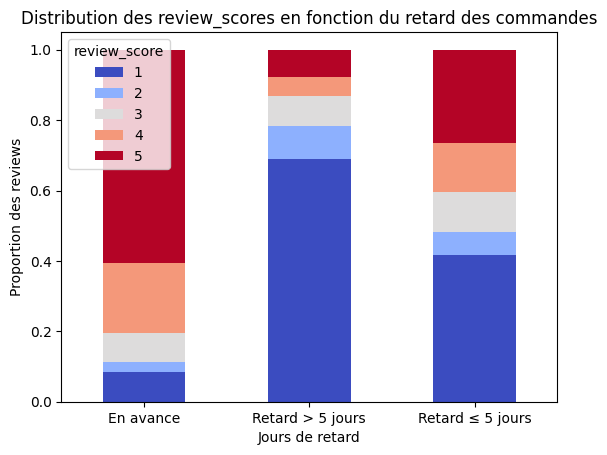

In [62]:
#Normaliser les proportions pour visualiser clairement la relation entre les jours de retards et le review_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_test=df_final_merged_6.copy()
# Grouper par retard et review_score
df_test['late_category'] = df_test['Number_of_days_of_delay'].apply(lambda x: 'En avance' if x < 0 else ('Retard > 5 jours' if x > 5 else 'Retard ≤ 5 jours'))
review_counts = df_test.groupby(['late_category', 'review_score']).size().unstack()

# Normalisation des proportions
review_counts = review_counts.div(review_counts.sum(axis=1), axis=0)

# Visualisation
review_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Distribution des review_scores en fonction du retard des commandes")
plt.xlabel("Jours de retard")

plt.ylabel("Proportion des reviews")
plt.xticks(rotation=0)  # Les étiquettes de l'axe y sont maintenant horizontales par défaut

plt.show()

Il semble bien y avoir une corrélation entre le nombre de jours de retard pour la commande et la note finale du client.

**/////**

Analyse des notes de satisfaction en fonction du type de produit

**/////**

In [63]:
df_category_product = df_final_merged_6.groupby('Catégorie de produit')['review_score'].mean()

# Get the 10 worst and 10 best categories
worst_categories = df_category_product.nsmallest(10).index
best_categories = df_category_product.nlargest(10).index
display(worst_categories)
display(best_categories)

Index(['security_and_services', 'diapers_and_hygiene', 'office_furniture',
       'home_comfort_2', 'fashion_male_clothing', 'fixed_telephony',
       'party_supplies', 'fashio_female_clothing',
       'furniture_mattress_and_upholstery', 'audio'],
      dtype='object', name='Catégorie de produit')

Index(['cds_dvds_musicals', 'fashion_childrens_clothes',
       'books_general_interest', 'costruction_tools_tools', 'flowers',
       'books_imported', 'books_technical', 'food_drink',
       'luggage_accessories', 'small_appliances_home_oven_and_coffee'],
      dtype='object', name='Catégorie de produit')

In [64]:
df_category_reset=df_category_product.sort_values().reset_index()
display(df_category_reset)

,Catégorie de produit,review_score
0,security_and_services,2.500000
1,diapers_and_hygiene,3.256410
2,office_furniture,3.493183
3,home_comfort_2,3.629630
4,fashion_male_clothing,3.641221
...,...,...
66,flowers,4.419355
67,costruction_tools_tools,4.444444
68,books_general_interest,4.446266
69,fashion_childrens_clothes,4.500000


<Axes: xlabel='review_score', ylabel='Catégorie de produit'>

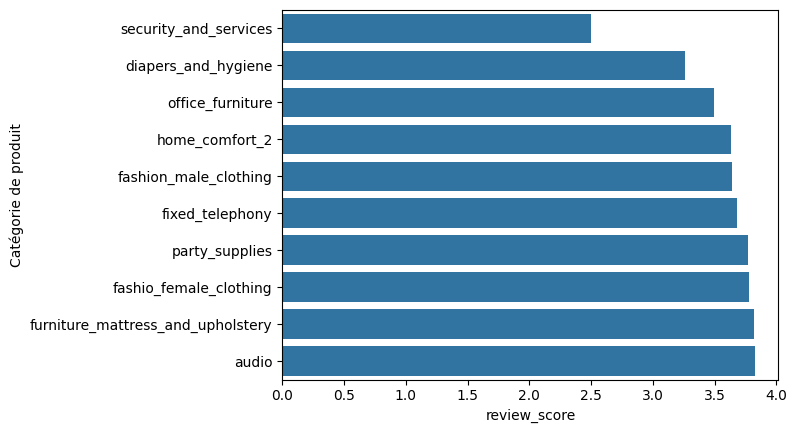

In [65]:
# Select the last 10 categories
last_10_categories = df_category_reset.head(10)

sns.barplot(x='review_score', y='Catégorie de produit', data=last_10_categories)


<Axes: xlabel='review_score', ylabel='Catégorie de produit'>

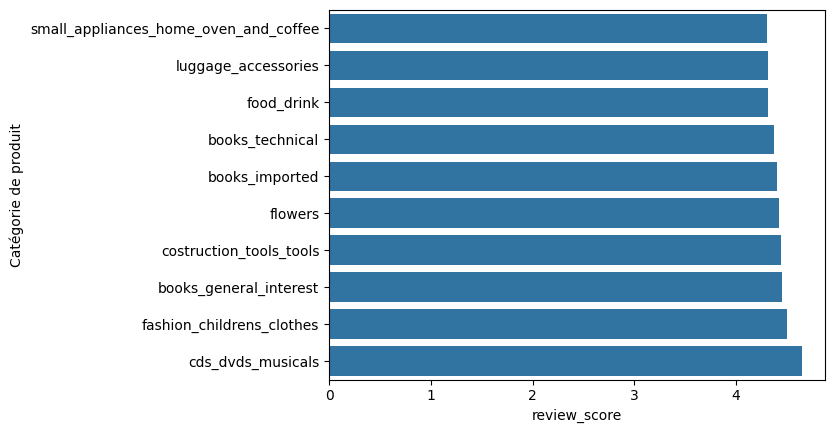

In [66]:
# Select the last 10 categories
top_10_categories = df_category_reset.tail(10)

sns.barplot(x='review_score', y='Catégorie de produit', data=top_10_categories)


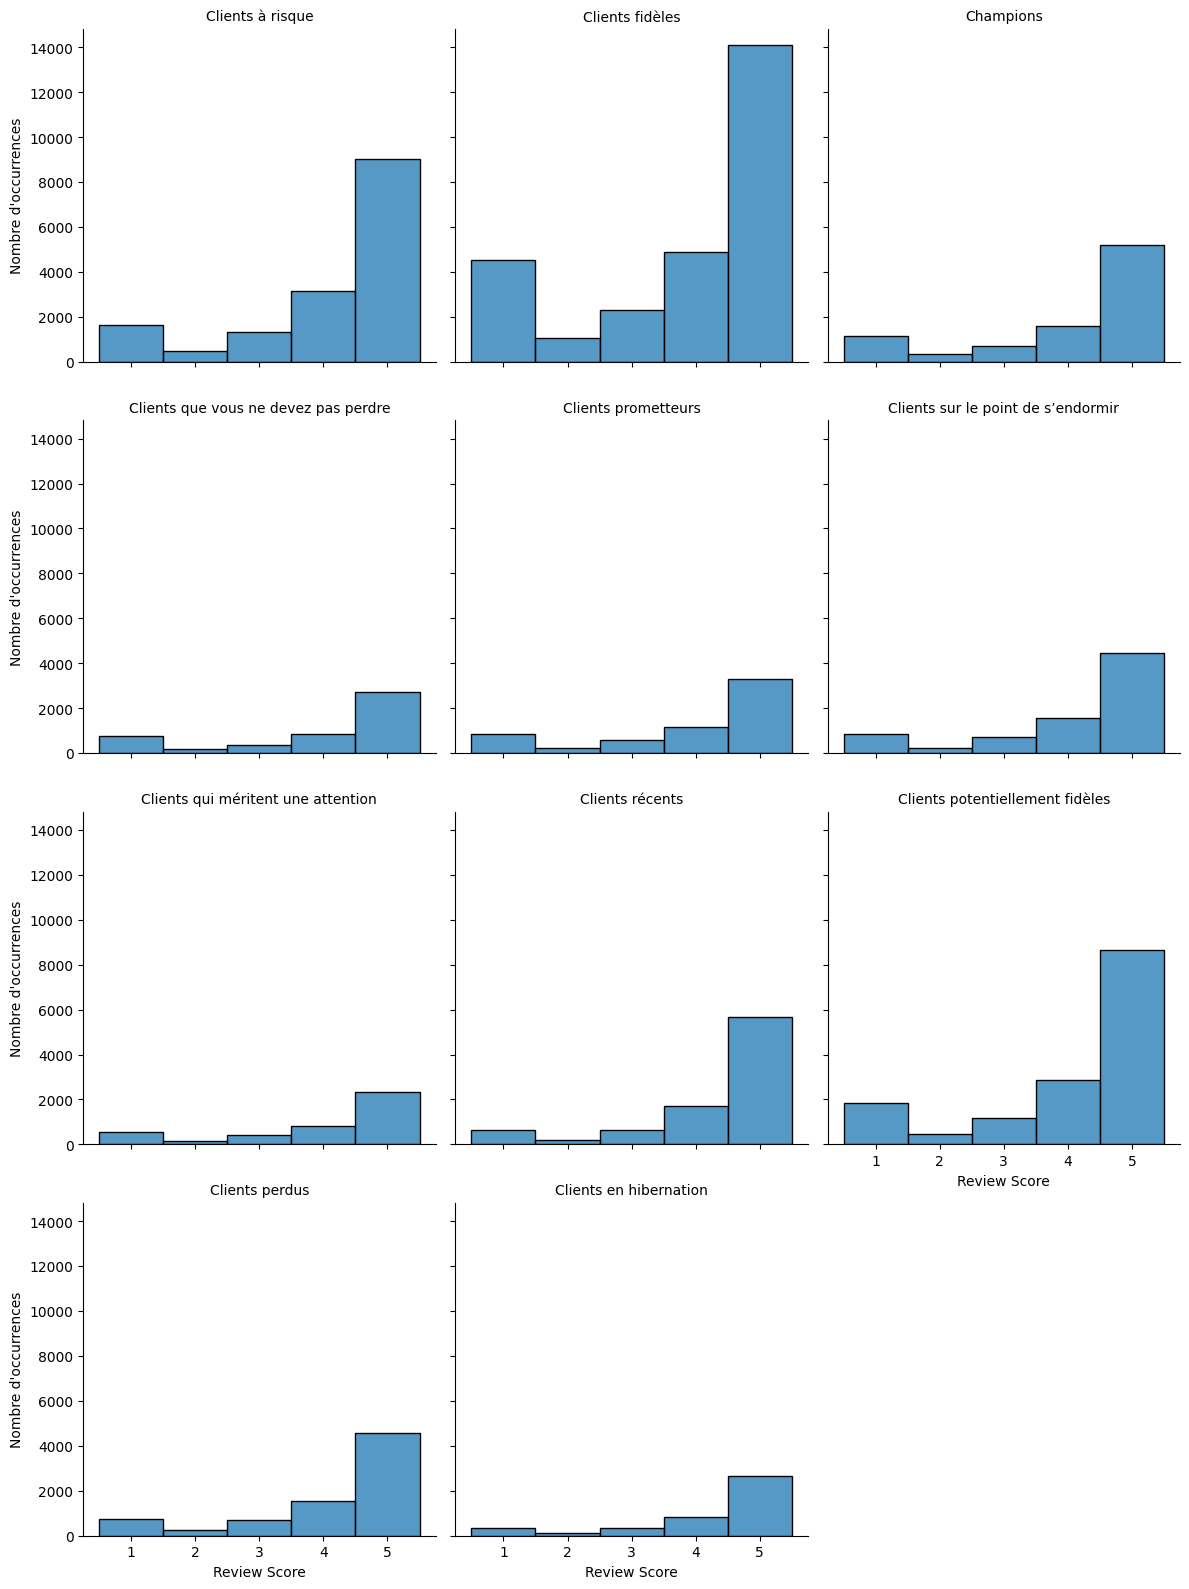

In [67]:
#Nombre de review_score par catégorie de client

g = sns.FacetGrid(df_final_merged_6, col="Category 2", col_wrap=3, sharex=True, sharey=True, height=4)
g.map(sns.histplot, "review_score", discrete=True)

g.set_titles(col_template="{col_name}")  # Affiche le nom de chaque catégorie
g.set_axis_labels("Review Score", "Nombre d'occurrences")

plt.show()

In [68]:
#Ajout du dataframe 'df_order_payment' pour la variable 'Number of installments'
df_final_merged_7=pd.merge(df_final_merged_6,df_order_payment,on='order_id')
df_final_merged_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115609 non-null  object        
 1   customer_unique_id             115609 non-null  object        
 2   customer_zip_code_prefix       115609 non-null  int64         
 3   customer_city                  115609 non-null  object        
 4   customer_state                 115609 non-null  object        
 5   order_id                       115609 non-null  object        
 6   order_status                   115609 non-null  object        
 7   order_purchase_timestamp       115609 non-null  datetime64[ns]
 8   order_approved_at              115595 non-null  datetime64[ns]
 9   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 10  order_delivered_customer_date  113209 non-null  datetime64[ns]
 11  

Pour pouvoir réaliser les essais d'algorithmes de classification sur nos jeux de données au sein d'un autre notebook, il faut exporter en format csv les différents dataframes que nous avons créé.

In [69]:
df_final_merged_4.to_csv('df_final_merged_4.csv', index=False)


In [70]:
df_final_merged_5.to_csv('df_final_merged_5.csv', index=False)
df_final_merged_6.to_csv('df_final_merged_6.csv', index=False)
df_final_merged_7.to_csv('df_final_merged_7.csv', index=False)